<p>This notebook requires images in a directory with the following structure:
<code>
signs
    test
        stop
        no-vehicles
    train
        vehicles
        no-vehicles
</code>

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing import image

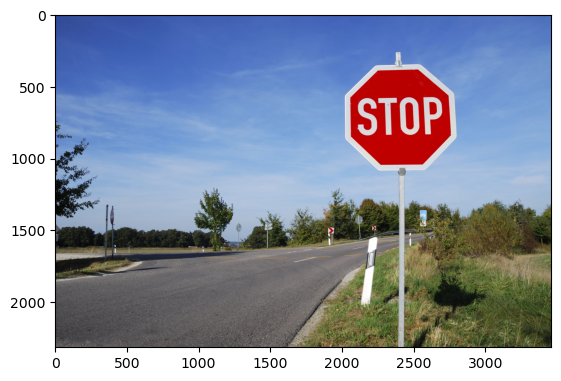

In [3]:
car1 = cv2.imread('./stop/2.jpg')
car1 = cv2.cvtColor(car1,cv2.COLOR_BGR2RGB)
plt.imshow(car1)

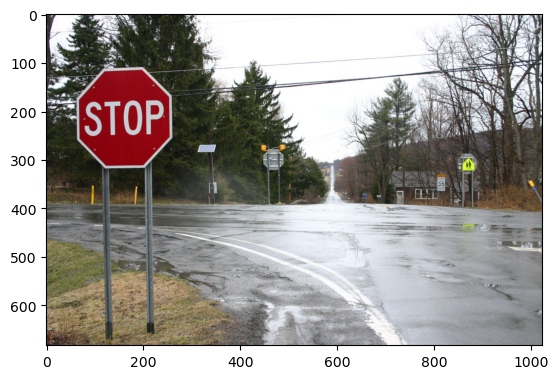

In [4]:
car2 = cv2.imread('./stop/9.jpg')
car2 = cv2.cvtColor(car2,cv2.COLOR_BGR2RGB)
plt.imshow(car2)

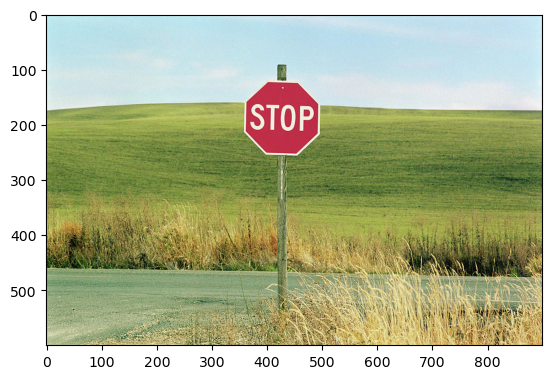

In [6]:
car3 = cv2.imread('./stop/17.jpg')
car3 = cv2.cvtColor(car3,cv2.COLOR_BGR2RGB)
plt.imshow(car3)

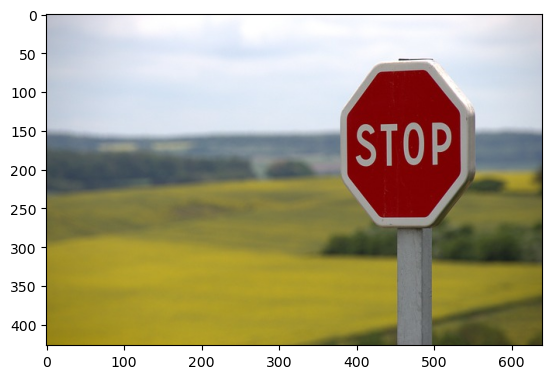

In [8]:
car4 = cv2.imread('./stop/26.jpg')
car4 = cv2.cvtColor(car4,cv2.COLOR_BGR2RGB)
plt.imshow(car4)

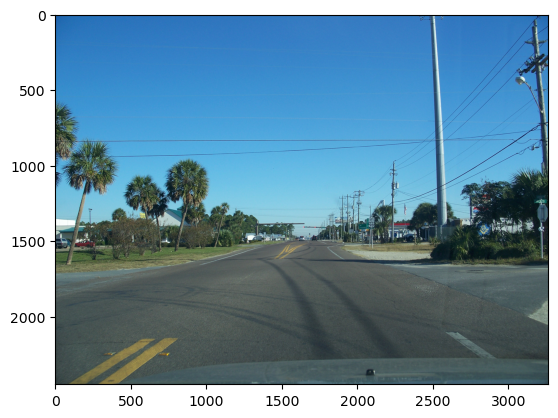

In [10]:
ncar1 = cv2.imread('./not_stop/103.jpg')
ncar1 = cv2.cvtColor(ncar1,cv2.COLOR_BGR2RGB)
plt.imshow(ncar1)

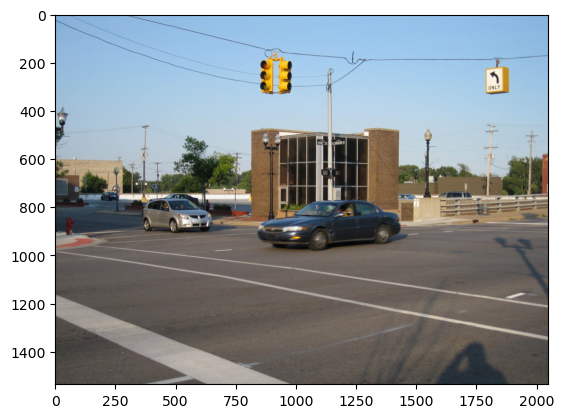

In [11]:
ncar2 = cv2.imread('./not_stop/105.jpg')
ncar2 = cv2.cvtColor(ncar2,cv2.COLOR_BGR2RGB)
plt.imshow(ncar2)

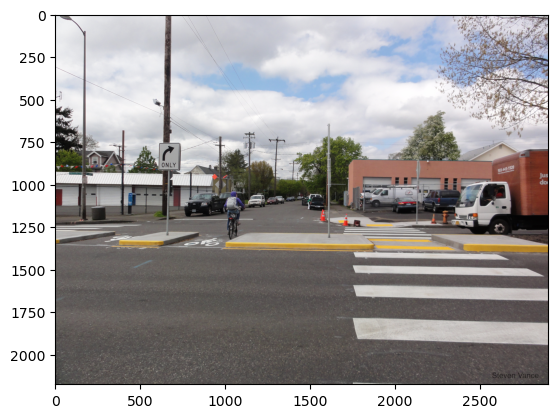

In [12]:
ncar3 = cv2.imread('./not_stop/111.jpg')
ncar3 = cv2.cvtColor(ncar3,cv2.COLOR_BGR2RGB)
plt.imshow(ncar3)

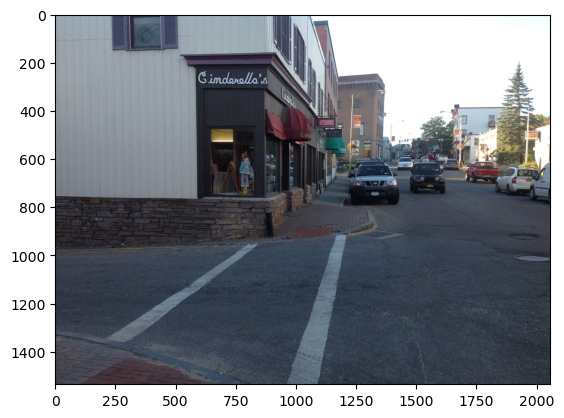

In [13]:
ncar4 = cv2.imread('./not_stop/112.jpg')
ncar4 = cv2.cvtColor(ncar4,cv2.COLOR_BGR2RGB)
plt.imshow(ncar4)

In [18]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Define the batch size and image shape
batch_size = 10
image_shape = (150, 150, 3)

# Create an instance of the ImageDataGenerator class for data augmentation
image_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               validation_split=0.2)

# Load the data from a directory and split it into training and testing sets
source_dir = '.'
train_generator = image_gen.flow_from_directory(source_dir,
                                                 target_size=image_shape[:2],
                                                 batch_size=batch_size,
                                                 class_mode='binary',
                                                 subset='training')

test_generator = image_gen.flow_from_directory(source_dir,
                                                target_size=image_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle=False)

# Define the model architecture
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# Train the model on the training data and validate it on the testing data
epochs = 50
history = model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=len(train_generator),
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f'Test accuracy: {test_acc}')

# Save the model to a file
model.save('stop_not_stop.h5')

Found 158 images belonging to 2 classes.
Found 39 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                       

/Users/ytsang/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


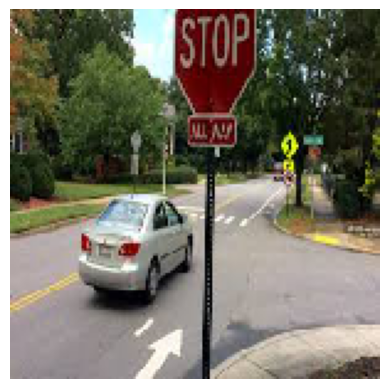

1/1 [==============================] - 0s 32ms/step
Probability that image is a stop sign is: 1.0
Prediction: stop sign


In [22]:
from keras.models import load_model

# Load the saved model
model = load_model('stop_not_stop.h5')

# Load an image and preprocess it
vehicle_file = './online_pics/stop-sign-1.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
v_img_arr = image.img_to_array(v_img)
v_img_arr = v_img_arr/255
v_img_arr = np.expand_dims(v_img_arr, axis=0)

# Show the image
plt.imshow(v_img_arr[0])
plt.axis('off')
plt.show()

# Make a prediction using the model
prediction_prob = model.predict(v_img_arr)
if prediction_prob > 0.5:
    prediction = 'stop sign'
else:
    prediction = 'not a stop sign'

print(f'Probability that image is a stop sign is: {prediction_prob[0][0]}')
print(f'Prediction: {prediction}')

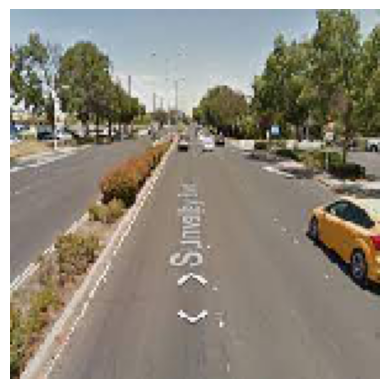

1/1 [==============================] - 0s 32ms/step
Probability that image is a stop sign is: 0.2707963287830353
Prediction: not a stop sign


In [23]:
from keras.models import load_model

# Load the saved model
model = load_model('stop_not_stop.h5')

# Load an image and preprocess it
vehicle_file = './online_pics/street_view.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
v_img_arr = image.img_to_array(v_img)
v_img_arr = v_img_arr/255
v_img_arr = np.expand_dims(v_img_arr, axis=0)

# Show the image
plt.imshow(v_img_arr[0])
plt.axis('off')
plt.show()

# Make a prediction using the model
prediction_prob = model.predict(v_img_arr)
if prediction_prob > 0.5:
    prediction = 'stop sign'
else:
    prediction = 'not a stop sign'

print(f'Probability that image is a stop sign is: {prediction_prob[0][0]}')
print(f'Prediction: {prediction}') 

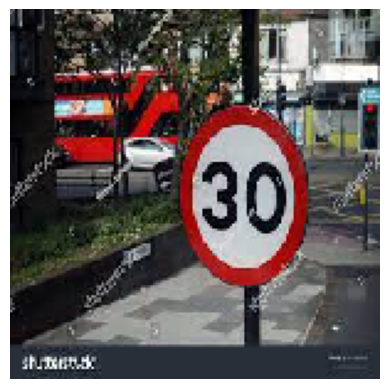

1/1 [==============================] - 0s 32ms/step
Probability that image is a stop sign is: 1.0
Prediction: stop sign


In [25]:
from keras.models import load_model

# Load the saved model
model = load_model('stop_not_stop.h5')

# Load an image and preprocess it
vehicle_file = './online_pics/confuse.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
v_img_arr = image.img_to_array(v_img)
v_img_arr = v_img_arr/255
v_img_arr = np.expand_dims(v_img_arr, axis=0)

# Show the image
plt.imshow(v_img_arr[0])
plt.axis('off')
plt.show()

# Make a prediction using the model
prediction_prob = model.predict(v_img_arr)
if prediction_prob > 0.5:
    prediction = 'stop sign'
else:
    prediction = 'not a stop sign'

print(f'Probability that image is a stop sign is: {prediction_prob[0][0]}')
print(f'Prediction: {prediction}') 

Found 161 images belonging to 3 classes.
Found 39 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                       

/Users/ytsang/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


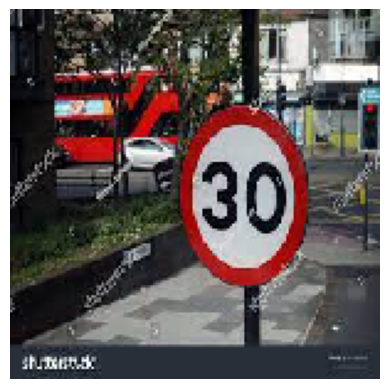

1/1 [==============================] - 0s 32ms/step
Probability that image is a stop sign is: 1.0
Prediction: stop sign


In [28]:
#Build a new model

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Define the batch size and image shape
batch_size = 10
image_shape = (150, 150, 3)

# Create an instance of the ImageDataGenerator class for data augmentation
image_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               validation_split=0.2)

# Load the data from a directory and split it into training and testing sets
source_dir = '.'
train_generator = image_gen.flow_from_directory(source_dir,
                                                 target_size=image_shape[:2],
                                                 batch_size=batch_size,
                                                 class_mode='binary',
                                                 subset='training')

test_generator = image_gen.flow_from_directory(source_dir,
                                                target_size=image_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle=False)

# Define the model architecture
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# Train the model on the training data and validate it on the testing data
epochs = 50
history = model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=len(train_generator),
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f'Test accuracy: {test_acc}')

# Save the model to a file
model.save('stop_not_stop_v2.h5')

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the new model
model = load_model('stop_not_stop_v2.h5')

# Load an image and preprocess it
vehicle_file = './online_pics/confuse.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
v_img_arr = image.img_to_array(v_img)
v_img_arr = v_img_arr/255
v_img_arr = np.expand_dims(v_img_arr, axis=0)

# Show the image
plt.imshow(v_img_arr[0])
plt.axis('off')
plt.show()

# Make a prediction using the new model
prediction_prob = model.predict(v_img_arr)
if prediction_prob > 0.5:
    prediction = 'stop sign'
else:
    prediction = 'not a stop sign'

print(f'Probability that image is a stop sign is: {prediction_prob[0][0]}')
print(f'Prediction: {prediction}')

# Evaluating the Model

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

epochs = 50
batch_size = 10
image_shape = (150,150,3)

model = load_model('stop_not_stop.h5')

train_set = './stop'

# model.reset_states() # not sure when I should do this. It doesn't actually reset anything!

image_gen = ImageDataGenerator(rotation_range=5, # rotate the image 5 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 10%
                               height_shift_range=0.2, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalizing it.
                               shear_range=0.02, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.02, # Zoom in by 20% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

train_image_gen = image_gen.flow_from_directory(train_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

test_set = './stop'
test_image_gen = image_gen.flow_from_directory(test_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

results = model.fit_generator(train_image_gen,epochs=epochs,
                              steps_per_epoch=10,
                              validation_data=test_image_gen,
                              validation_steps=10)

results.history['accuracy'][epochs-1] # ending accuracy

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0